In [32]:
#This is for learning purposes using
#Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurélien Géron (O’Reilly).
#Copyright 2019 Aurélien Géron, 978-1-492-03264-9.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

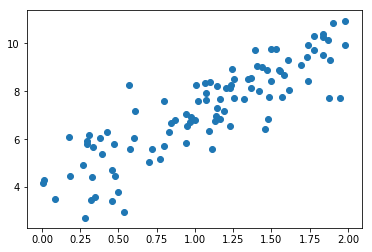

In [16]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
plt.scatter(X,y)

In [17]:
X_b = np.c_[np.ones((100,1)), X]
X.shape

(100, 1)

In [24]:
# this is the normal equation: θˆ=(X^T*X)^−1*X^T*y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
# would hope for θ0 to be 4 and θ1 to be 2 but noise skews... noise is represented as
# Guassian noise (np.random.randn(100, 1))

array([[3.88302127],
       [3.11838188]])

In [40]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # slap on 1's
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.88302127],
       [10.11978503]])

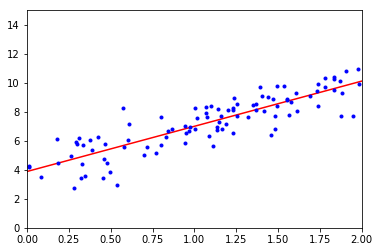

In [29]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
# same result as above, using normal equation

(array([3.88302127]), array([[3.11838188]]))

In [42]:
lin_reg.predict(X_new)

array([[ 3.88302127],
       [10.11978503]])

In [45]:
# same as the scipy.linalg.lstsq function
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.88302127],
       [3.11838188]])

In [ ]:
# pseudo-inverse (Moore-Penrose) uses Singular Value Decomposition (SVD),
# decomposes training set into multiplication of three matricies, computed as
# X^+=VΣ^+U^T where Σ^+ sets zero all values below a threshold, inverts all non-zero values,
# and transposes the matrix... SVD handles edge cases better than normal equation and is faster
